In [ ]:
import ee
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install xee
import xee

In [ ]:
# EE-registered cloud project ID and initialize the EE client with the high volume API.
ee.Authenticate()
ee.Initialize(project= "reflected-flux-440109-p1",  opt_url='https://earthengine-highvolume.googleapis.com' )

In [ ]:
# Product information
mod=ee.ImageCollection("MODIS/061/MOD09A1").select("sur_refl_b02", "sur_refl_b04").filterDate("2000","2025")


In [ ]:
# frame: //loc = [minX(Log), minY(Lat), maxX, maxY] var rectange= [44.91962890624998, 37.13602769483369, 45.99079589843748, 38.278952922247974] -
# Urmia, Iran:
#loc = ee.Geometry.Rectangle([44.91962890624998, 37.13602769483369, 45.99079589843748, 38.278952922247974])
# Great Salt Lake:
#loc = ee.Geometry.Rectangle([-113.15647304250523, 40.64108760793528, -111.80515468313023, 41.736514475397136])
# Aral sea:
loc = ee.Geometry.Rectangle([57.69760466967741,43.91651347015223, 62.04762557516024,47.00148815819316 ])

In [ ]:
# Open all bands in a specific projection (not the Xee default) 1 km = 0.01 of scale 1 degree = 100 km, 500m = 0.005
# Create dataset.
ds = xr.open_dataset(mod, engine="ee" , crs ='EPSG:4326', scale = 0.01, geometry=loc)

In [ ]:
ds

<xarray.Dataset> Size: 1GB
Dimensions:       (time: 1143, lon: 435, lat: 311)
Coordinates:
  * time          (time) datetime64[ns] 9kB 2000-02-18 2000-02-26 ... 2024-12-26
  * lon           (lon) float64 3kB 57.7 57.71 57.72 57.73 ... 62.02 62.03 62.04
  * lat           (lat) float64 2kB 43.92 43.93 43.94 43.95 ... 47.0 47.01 47.02
Data variables:
    sur_refl_b02  (time, lon, lat) float32 619MB ...
    sur_refl_b04  (time, lon, lat) float32 619MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
# Creating a variable and multiplying by the scale factor - is in the channel documents().
green = ds.sur_refl_b04 * 0.0001
nir = ds.sur_refl_b02 * 0.0001

In [ ]:
nir

<xarray.DataArray 'sur_refl_b02' (time: 1143, lon: 435, lat: 311)> Size: 619MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.299     , 0.2985    , 0.3023    , ..., 0.2395    ,
         0.2324    , 0.2121    ],
        [0.2999    , 0.3446    , 0.3274    , ..., 0.2313    ,
         0.2445    , 0.2219    ],
        [0.3011    , 0.3003    , 0.36049998, ..., 0.2313    ,
         0.2445    , 0.23009999],
...
        [0.3038    , 0.3094    , 0.30089998, ..., 0.6906    ,
         0.708     , 0.68079996],
        [0.3259    , 0.3094    , 0.30089998, ..., 0.6615    ,
         0.6807    , 0.70629996],
        [0.33069998, 0.33949998, 0.32299998, ..., 0.685     ,
         0.66859996, 0.6534    ]],

       [[0.2703    , 0.2701    , 0.27879998, ..., 0.69879997,
         0.7409    , 0.7448    ],
        [0.2735    , 0.2758    , 0.27359998, ..., 0.7086    ,
         0.71      , 0.72969997],
        [0.2746    , 0.2742    , 0.27249998, ..., 0.7086    ,
         0.71      , 0.7202    ],
        ...,
        [0.29639998, 0.30249998, 0.2988    , ..., 0.70739996,
         0.73289996, 0.7248    ],
        [0.3145    , 0.30249998, 0.2988    , ..., 0.68509996,
         0.70059997, 0.704     ],
        [0.32099998, 0.32709998, 0.3066    , ..., 0.664     ,
         0.69479996, 0.6684    ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 9kB 2000-02-18 2000-02-26 ... 2024-12-26
  * lon      (lon) float64 3kB 57.7 57.71 57.72 57.73 ... 62.02 62.03 62.04
  * lat      (lat) float64 2kB 43.92 43.93 43.94 43.95 ... 47.0 47.01 47.02

In [ ]:
# The Normalized Difference Water Index (NDWI)
# is a satellite-derived index used to identify
# and enhance open water features in remotely sensed imagery
# for each day, frequency = 8 day(accourding to mission info).
ndwi = (green - nir) / (green + nir)

In [ ]:
ndwi

<xarray.DataArray (time: 1143, lon: 435, lat: 311)> Size: 619MB
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-1.80884689e-01, -1.83819160e-01, -1.80859417e-01, ...,
         -1.70004889e-01, -1.69308200e-01, -1.50841027e-01],
        [-1.81871921e-01, -1.69721648e-01, -1.70330659e-01, ...,
         -1.71139240e-01, -1.64563015e-01, -1.75940678e-01],
        [-1.81479275e-01, -1.79034173e-01, -1.52125239e-01, ...,
         -1.71139240e-01, -1.64563015e-01, -1.61827818e-01],
...
          1.15929637e-02,  1.59149244e-02,  2.63854451e-02],
        [-1.73779935e-01, -1.89085320e-01, -1.85112223e-01, ...,
          1.23917684e-02,  1.49771925e-02,  1.71850324e-02],
        [-1.70205221e-01, -1.62671208e-01, -1.62288591e-01, ...,
          9.97251458e-03,  1.52441552e-02,  1.66302752e-02]],

       [[-2.18116269e-01, -2.15845153e-01, -2.19064251e-01, ...,
          2.10828539e-02,  2.26882920e-02,  2.63415985e-02],
        [-2.19077319e-01, -2.15245664e-01, -2.18979686e-01, ...,
          2.10678969e-02,  1.81843415e-02,  2.38127150e-02],
        [-2.19631374e-01, -2.16773912e-01, -2.20331371e-01, ...,
          2.10678969e-02,  1.81843415e-02,  2.34576017e-02],
        ...,
        [-1.92996562e-01, -1.91648588e-01, -1.92338392e-01, ...,
         -1.33218654e-02, -8.46230146e-03, -5.82849234e-03],
        [-1.89485654e-01, -1.91648588e-01, -1.92338392e-01, ...,
         -9.95059777e-03, -8.27516802e-03, -8.59600678e-03],
        [-1.85157806e-01, -1.89454541e-01, -1.89986408e-01, ...,
         -1.10391797e-02, -8.78401566e-03, -8.82954802e-03]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 9kB 2000-02-18 2000-02-26 ... 2024-12-26
  * lon      (lon) float64 3kB 57.7 57.71 57.72 57.73 ... 62.02 62.03 62.04
  * lat      (lat) float64 2kB 43.92 43.93 43.94 43.95 ... 47.0 47.01 47.02

In [ ]:
# Converting to annual frequency.
# For each year mean value of ndwi.
ndwi_annual = ndwi.resample(time='Y').mean("time")


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


In [ ]:
ndwi_annual

<xarray.DataArray (time: 25, lon: 435, lat: 311)> Size: 14MB
array([[[-0.15914369, -0.1576229 , -0.15826896, ..., -0.17495526,
         -0.18155742, -0.1874498 ],
        [-0.16243277, -0.16391551, -0.15990475, ..., -0.17416535,
         -0.16375126, -0.18830732],
        [-0.16057086, -0.16473569, -0.15953308, ..., -0.17416535,
         -0.16375126, -0.1864705 ],
        ...,
        [-0.18799368, -0.18534727, -0.1816188 , ..., -0.19274768,
         -0.20065291, -0.2036329 ],
        [-0.18775862, -0.18534727, -0.1816188 , ..., -0.1892137 ,
         -0.19965774, -0.20404221],
        [-0.1880652 , -0.18465273, -0.18064427, ..., -0.1791532 ,
         -0.19870092, -0.20461728]],

       [[-0.15104772, -0.15289849, -0.15522535, ..., -0.13483423,
         -0.13709278, -0.13886029],
        [-0.15092452, -0.15072617, -0.15146519, ..., -0.13622367,
         -0.12939167, -0.14045371],
        [-0.15002617, -0.14923066, -0.14780404, ..., -0.13622367,
         -0.12939167, -0.14045891],
...
        [-0.19884472, -0.19939905, -0.19876656, ..., -0.26077864,
         -0.27174208, -0.27462658],
        [-0.20415571, -0.19939905, -0.19876656, ..., -0.246785  ,
         -0.2650502 , -0.27543566],
        [-0.19706938, -0.19830984, -0.19466405, ..., -0.22686258,
         -0.25539193, -0.26081592]],

       [[-0.18893136, -0.18884689, -0.18717134, ..., -0.20366353,
         -0.20750834, -0.20417555],
        [-0.19056375, -0.19072531, -0.18858142, ..., -0.20480323,
         -0.19278884, -0.20788738],
        [-0.19133845, -0.19221646, -0.19296616, ..., -0.20480323,
         -0.19278884, -0.20175105],
        ...,
        [-0.20284683, -0.20494752, -0.2018041 , ..., -0.21541007,
         -0.21990842, -0.22590533],
        [-0.203942  , -0.20494752, -0.2018041 , ..., -0.20918489,
         -0.22243886, -0.22491565],
        [-0.20272852, -0.20202099, -0.20043579, ..., -0.19460335,
         -0.21703538, -0.22446497]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 57.7 57.71 57.72 57.73 ... 62.02 62.03 62.04
  * lat      (lat) float64 2kB 43.92 43.93 43.94 43.95 ... 47.0 47.01 47.02
  * time     (time) datetime64[ns] 200B 2000-12-31 2001-12-31 ... 2024-12-31

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

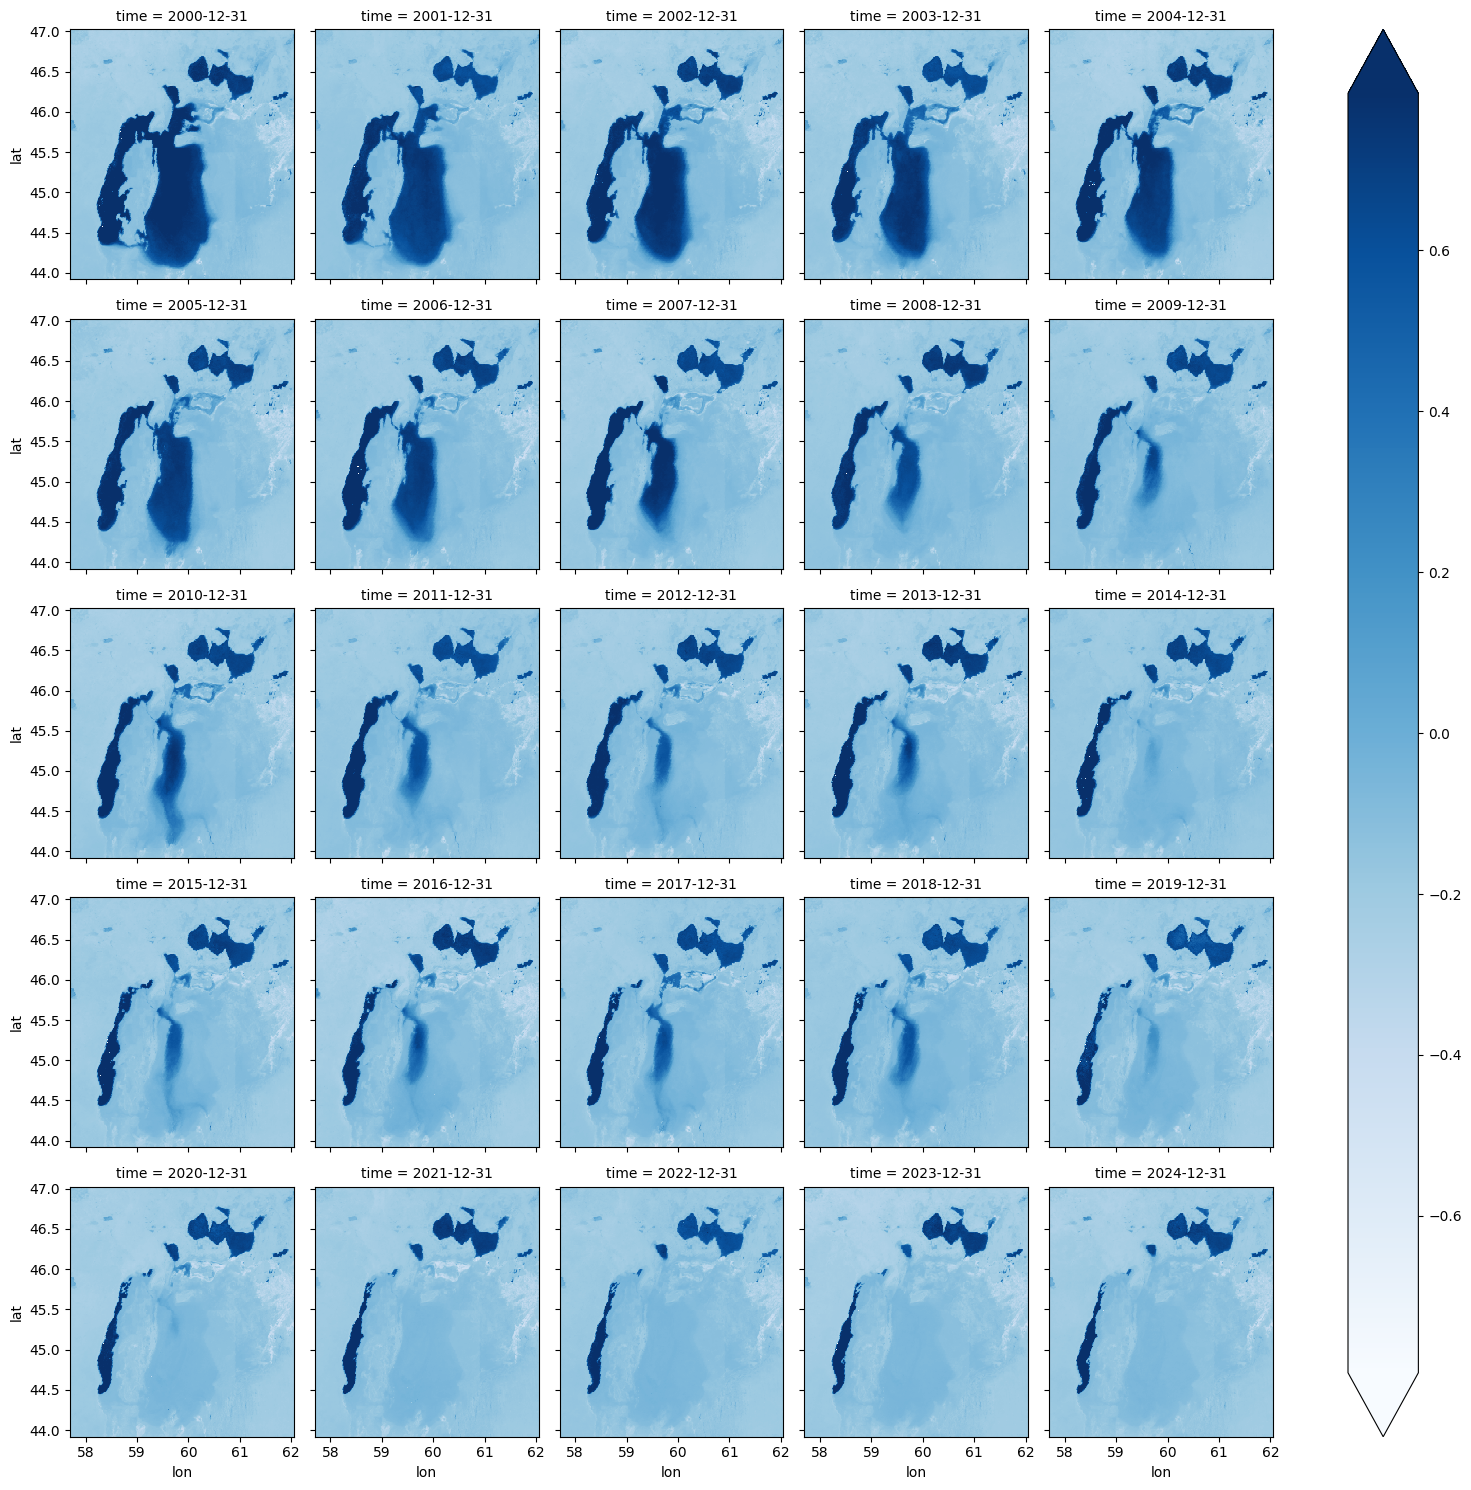

In [ ]:
# Plot the NDWI variation, the annual average NDWI for the target area.
plot = ndwi_annual.plot(x = "lon", y = "lat", cmap = "Blues", col  ="time", col_wrap=5, robust=True )

# Exports.
plt.savefig("ndwi_annual.png", dpi=360, bbox_inches="tight")
from google.colab import files
files.download("ndwi_annual.png")